In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Windows 10
Python version  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version  1.5.3
bifacial_radiance version  0.4.2+313.g615fab5.dirty
pyplot  3.5.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 90
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Making path: images
Making path: objects
Making path: results
Making path: skies
Making path: EPWs
Making path: materials
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json


In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies\\sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    groundscan = analysis.groundAnalysis(scene, sensorsground=sensorsground)
    ground = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x >= 1 and x <= pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Front
Saved: results\irr_groundscan2.csv
{'Wm2': array([17.07684, 16.37431]), 'x': array([0. , 5.7]), 'y': array([0.000000e+00, 3.490243e-16]), 'z': array([0.05, 0.05]), 'r': array([17.07684, 16.37431]), 'g': array([17.07684, 16.37431]), 'b': array([17.07684, 16.37431]), 'mattype': array(['groundplane', 'groundplane'], dtype='<U32'), 'title': 'groundscan2_Front'}

sensorsground: 3
Linescan in process: groundscan3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saved: results\irr_groundscan3.csv
{'Wm2': array([ 16.66806, 957.9254 ,  16.82598]), 'x': array([0.  , 2.85, 5.7 ]), 'y': array([0.000000e+00, 1.745122e-16, 3.490243e-16]), 'z': array([0.05, 0.05, 0.05]), 'r': array([ 16.66806, 957.9254 ,  16.82598]), 'g': array([ 16.66806, 957.9254 ,  16.82598]), 'b': array([ 16.66806, 957.9254 ,  16.82598]), 'mattype': array(['groundplane', 'groundplane', 'groundplane'], dtype='<U32'), 'title': 'groundscan3_Front'}

sensorsground: 5
Linescan in process: groundscan5_Front
Saved: results\irr_groundscan5.csv
{'Wm2': array([ 16.54542, 958.0611 , 958.4005 , 954.0415 ,  17.09313]), 'x': array([0.   , 1.425, 2.85 , 4.275, 5.7  ]), 'y': array([0.000000e+00, 8.725608e-17, 1.745122e-16, 2.617683e-16,
       3.490243e-16]), 'z': array([0.05, 0.05, 0.05, 0.05, 0.05]), 'r': array([ 16.54542, 958.0611 , 958.4005 , 954.0415 ,  17.09313]), 'g': array([ 16.54542, 958.0611 , 958.4005 , 954.0415 ,  17.09313]), 'b': array([ 16.54542, 958.0611 , 958.4005 , 954.0415 ,  17

Saved: results\irr_groundscan150.csv
{'Wm2': array([ 16.59271,  16.2897 ,  15.98668,  16.85371,  17.45016,  18.04661,
        20.91072,  21.88168,  22.85264,  32.46971,  34.03362,  35.59753,
        74.87892, 881.4238 , 885.0902 , 926.9476 , 932.781  , 938.6144 ,
       944.4425 , 946.8512 , 949.2599 , 951.6686 , 951.7111 , 952.2958 ,
       952.8806 , 953.4653 , 954.05   , 956.1121 , 956.0961 , 956.0801 ,
       956.0641 , 956.0481 , 956.0321 , 956.0161 , 956.0001 , 955.9841 ,
       958.0383 , 958.0597 , 958.081  , 958.1024 , 958.1237 , 958.145  ,
       958.1664 , 958.1877 , 958.2091 , 958.2304 , 958.2518 , 958.2731 ,
       958.2944 , 958.255  , 958.2502 , 958.2454 , 958.2405 , 958.2357 ,
       958.2308 , 958.226  , 958.2211 , 958.2163 , 958.2114 , 958.2066 ,
       958.2018 , 958.197  , 958.1921 , 958.1873 , 958.1824 , 958.1292 ,
       958.1212 , 958.1132 , 958.1052 , 958.0972 , 958.0892 , 958.0812 ,
       958.0732 , 958.0652 , 958.0573 , 958.0493 , 958.0413 , 958.0333 ,
      

Saved: results\irr_groundscan200.csv
{'Wm2': array([ 16.32701,  16.09699,  15.86697,  15.63695,  16.83055,  17.26719,
        17.70382,  19.11234,  19.80836,  20.50439,  25.0808 ,  25.99614,
        26.91148,  39.03965,  40.44356,  41.84747,  74.76557, 880.3844 ,
       883.1248 , 918.5175 , 922.4919 , 926.4664 , 937.4087 , 941.1493 ,
       944.89   , 948.6306 , 948.1139 , 949.0885 , 950.0632 , 951.0378 ,
       952.0125 , 952.6909 , 952.9908 , 953.2908 , 953.5907 , 953.8906 ,
       954.1906 , 954.4905 , 956.7852 , 956.83   , 956.8749 , 956.9197 ,
       956.9645 , 957.0093 , 957.0541 , 957.099  , 957.1438 , 957.1886 ,
       957.2335 , 957.2783 , 957.3231 , 957.3679 , 958.272  , 958.2786 ,
       958.2852 , 958.2917 , 958.2983 , 958.3049 , 958.3115 , 958.3181 ,
       958.3247 , 958.3313 , 958.3379 , 958.3445 , 958.351  , 958.3576 ,
       958.3642 , 958.3708 , 958.3774 , 958.384  , 958.3906 , 958.3972 ,
       958.3666 , 958.3668 , 958.3671 , 958.3672 , 958.3675 , 958.3677 ,
      

Saved: results\irr_groundscan250.csv
{'Wm2': array([ 16.70688,  16.58398,  16.46108,  16.33818,  16.14184,  16.32353,
        16.50522,  16.68691,  18.64598,  19.19007,  19.73416,  20.27825,
        24.03849,  24.73488,  25.43127,  26.12766,  37.0982 ,  38.16523,
        39.23227,  40.2993 ,  74.26692, 879.3215 , 881.4976 , 883.6737 ,
       920.1425 , 923.4154 , 926.6884 , 929.9612 , 939.1133 , 941.6696 ,
       944.2259 , 946.7822 , 949.3385 , 951.8948 , 949.5422 , 950.1676 ,
       950.793  , 951.4184 , 952.0438 , 952.6692 , 954.0199 , 954.1268 ,
       954.2336 , 954.3405 , 954.4473 , 954.5541 , 954.6609 , 954.7678 ,
       954.8746 , 954.9815 , 957.221  , 957.2438 , 957.2667 , 957.2896 ,
       957.3124 , 957.3353 , 957.3582 , 957.381  , 957.4039 , 957.4268 ,
       957.4496 , 957.4725 , 957.4954 , 957.5182 , 957.5411 , 957.5639 ,
       957.5868 , 957.6096 , 958.4816 , 958.4861 , 958.4907 , 958.4953 ,
       958.4999 , 958.5045 , 958.509  , 958.5135 , 958.5182 , 958.5227 ,
      

Saved: results\irr_groundscan300.csv
{'Wm2': array([ 16.5273 ,  16.33789,  16.14849,  15.95908,  15.76968,  16.37731,
        16.58209,  16.78687,  16.99166,  17.19644,  18.43705,  18.88372,
        19.33038,  19.77705,  20.22371,  25.13726,  25.74536,  26.35346,
        26.96157,  27.56967,  41.29606,  42.28539,  43.27472,  44.26405,
        45.25339, 888.2872 , 890.371  , 892.4548 , 894.5386 , 896.6224 ,
       926.2926 , 929.1476 , 932.0026 , 934.8576 , 937.7126 , 941.7797 ,
       943.3055 , 944.8313 , 946.3572 , 947.8829 , 949.4088 , 950.0436 ,
       950.6135 , 951.1833 , 951.7532 , 952.3231 , 952.893  , 953.4629 ,
       953.9752 , 954.0328 , 954.0903 , 954.1478 , 954.2053 , 954.2628 ,
       954.3203 , 954.3778 , 954.4353 , 954.4928 , 954.5503 , 954.6078 ,
       954.6653 , 954.7228 , 957.2028 , 957.2355 , 957.2682 , 957.301  ,
       957.3337 , 957.3665 , 957.3992 , 957.432  , 957.4647 , 957.4975 ,
       957.5302 , 957.563  , 957.5957 , 957.6284 , 957.6612 , 957.694  ,
      

Saved: results\irr_groundscan400.csv
{'Wm2': array([ 16.7148 ,  16.62141,  16.52802,  16.43463,  16.34124,  16.24785,
        16.15446,  16.06108,  15.96769,  17.31053,  17.5745 ,  17.83847,
        18.10243,  18.3664 ,  18.63037,  19.3142 ,  19.64188,  19.96956,
        20.29725,  20.62493,  20.95261,  25.87813,  26.35054,  26.82295,
        27.29537,  27.76778,  28.24019,  42.42678,  43.18993,  43.95307,
        44.71622,  45.47937,  46.24251, 884.9743 , 886.475  , 887.9758 ,
       889.4765 , 890.9772 , 892.478  , 922.4985 , 924.5132 , 926.5279 ,
       928.5426 , 930.5573 , 932.572  , 939.2247 , 940.7864 , 942.3481 ,
       943.9099 , 945.4716 , 947.0333 , 948.595  , 948.5224 , 949.0946 ,
       949.6669 , 950.2391 , 950.8114 , 951.3836 , 951.9559 , 952.5281 ,
       953.1003 , 953.3378 , 953.4493 , 953.5607 , 953.6721 , 953.7836 ,
       953.895  , 954.0064 , 954.1179 , 954.2292 , 954.3407 , 954.4521 ,
       954.5635 , 954.675  , 954.7864 , 956.658  , 956.6825 , 956.707  ,
      

Saved: results\irr_groundscan500.csv
{'Wm2': array([ 16.57509,  16.4553 ,  16.33551,  16.21571,  16.09592,  15.97613,
        15.85634,  15.73655,  16.59574,  16.70427,  16.81281,  16.92135,
        17.02989,  17.13843,  17.24697,  17.3555 ,  18.66061,  18.93226,
        19.20391,  19.47556,  19.7472 ,  20.01885,  20.2905 ,  22.39283,
        22.71928,  23.04573,  23.37218,  23.69863,  24.02507,  24.35152,
        32.69829,  33.16739,  33.63649,  34.10559,  34.57469,  35.0438 ,
        35.5129 ,  56.3662 ,  57.19032,  58.01443,  58.83855, 862.5411 ,
       863.3652 , 864.1894 , 901.5274 , 902.9697 , 904.4121 , 905.8545 ,
       907.2968 , 908.7392 , 910.1815 , 929.0535 , 930.8398 , 932.6262 ,
       934.4125 , 936.1989 , 937.9852 , 939.7715 , 941.2223 , 942.2076 ,
       943.1929 , 944.1782 , 945.1635 , 946.1487 , 947.134  , 948.1193 ,
       949.1046 , 948.9278 , 949.2685 , 949.6092 , 949.9498 , 950.2905 ,
       950.6312 , 950.9719 , 951.3126 , 951.6533 , 951.994  , 952.3347 ,
      

In [14]:
results

[nan,
 330.47314666666665,
 580.82833,
 762.2270609999999,
 765.2750585,
 766.95293,
 777.4905799000001,
 780.3482726666667,
 782.1024722999999,
 786.33991972,
 786.2775059666666,
 786.643399325,
 787.98571316]

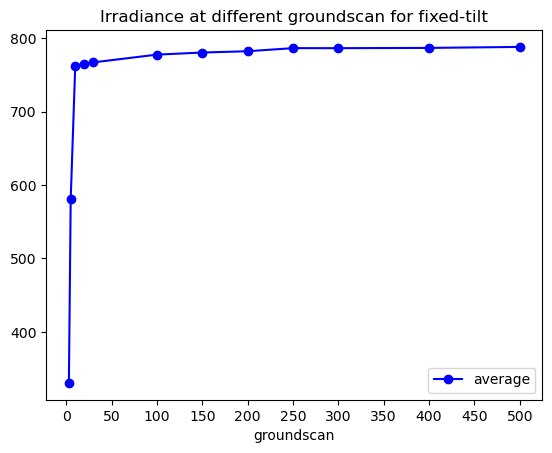

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()